In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Hip-Hop Tracks EDA

Load the dataframe and add a new column for `release_year` of each track.

In [2]:
with open('tracks_df.pickle', 'rb') as f:
    df = pickle.load(f)

In [3]:
def datestring_to_year(datestring):
    return int(datestring.split('-')[0])

In [4]:
df['release_year'] = df['release_date'].apply(lambda i: datestring_to_year(i))

I'm specifically interested in hip-hop music from the year 2000 onward, so I'll record and plot the number of tracks by year.

In [5]:
release_year_counts = df[df['release_year'] >= 2000].groupby('release_year')['track_name'] \
    .count() \
    .reset_index(name='count') \
    .sort_values(['release_year'])
    
release_year_counts

,release_year,count
0,2000,812
1,2001,1078
2,2002,966
3,2003,1115
4,2004,1177
5,2005,1267
6,2006,1557
7,2007,1347
8,2008,1275
9,2009,1366


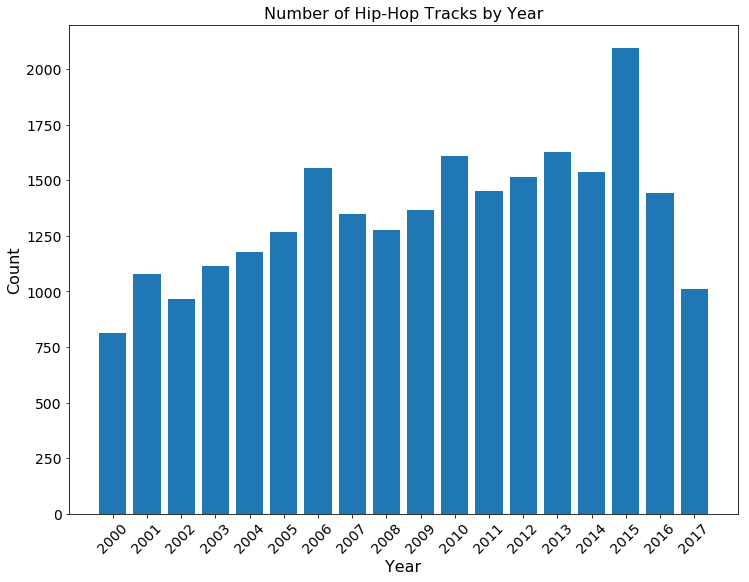

In [6]:
plt.figure(figsize=(12,9))
plt.bar(release_year_counts['release_year'], release_year_counts['count'])
plt.xticks([year for year in range(2000,2018)], rotation=45, size=14)
plt.xlabel('Year', size=16)
plt.yticks(size=14)
plt.ylabel('Count', size=16)
plt.title('Number of Hip-Hop Tracks by Year',size=16);